<a href="https://colab.research.google.com/github/asritha7125/WarrantyML/blob/main/Phase_1%2C2_warranty_data_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import random
from datetime import datetime, timedelta

# Parameters
num_records = 500  # You can increase this if needed
product_types = ['Laptop', 'Washing Machine', 'Smartphone', 'Refrigerator', 'TV']
regions = ['North', 'South', 'East', 'West', 'Central']
issue_types = ['Battery Issue', 'Screen Damage', 'Motor Fault', 'Cooling Problem', 'Software Issue']
claim_statuses = ['Approved', 'Rejected', 'Pending']

# Function to generate random dates
def random_date(start_date, end_date):
    return start_date + timedelta(days=random.randint(0, (end_date - start_date).days))

# Generate synthetic warranty data
data = []
for i in range(num_records):
    product_id = f"P{i+1000}"
    customer_id = f"C{i+5000}"
    purchase_date = random_date(datetime(2020, 1, 1), datetime(2023, 12, 31))
    warranty_period = random.choice([12, 24, 36])  # in months
    max_claim_date = purchase_date + timedelta(days=30 * warranty_period)
    claim_made = random.choice([True, False])
    claim_date = random_date(purchase_date, max_claim_date) if claim_made else None
    claim_status = random.choice(claim_statuses) if claim_made else 'No Claim'
    product_type = random.choice(product_types)
    region = random.choice(regions)
    issue_type = random.choice(issue_types) if claim_made else None
    repair_cost = round(random.uniform(100, 10000), 2) if claim_made and claim_status == 'Approved' else 0

    data.append([
        product_id, customer_id, purchase_date.date(), warranty_period,
        claim_date.date() if claim_date else None,
        claim_status, product_type, region, issue_type, repair_cost
    ])

# Create DataFrame
df = pd.DataFrame(data, columns=[
    'Product_ID', 'Customer_ID', 'Purchase_Date', 'Warranty_Period',
    'Claim_Date', 'Claim_Status', 'Product_Type', 'Region',
    'Issue_Type', 'Repair_Cost'
])

# Save to CSV
df.to_csv("warranty_data.csv", index=False)
print("✅ warranty_data.csv created successfully.")


✅ warranty_data.csv created successfully.


In [ ]:
from google.colab import files
files.download("warranty_data.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd

df = pd.read_csv('warranty_data.csv')
df.head()


,Product_ID,Customer_ID,Purchase_Date,Warranty_Period,Claim_Date,Claim_Status,Product_Type,Region,Issue_Type,Repair_Cost
0,P1000,C5000,2022-09-20,12,2023-02-12,Pending,Smartphone,North,Screen Damage,0.00
1,P1001,C5001,2021-03-18,24,NaN,No Claim,Refrigerator,West,NaN,0.00
2,P1002,C5002,2023-10-14,36,2025-02-22,Approved,Smartphone,North,Screen Damage,1774.11
3,P1003,C5003,2020-11-08,12,2020-12-12,Rejected,Smartphone,South,Motor Fault,0.00
4,P1004,C5004,2021-07-09,24,NaN,No Claim,TV,South,NaN,0.00


In [ ]:
df['Purchase_Date'] = pd.to_datetime(df['Purchase_Date'], errors='coerce')
df['Claim_Date'] = pd.to_datetime(df['Claim_Date'], errors='coerce')


In [ ]:
df.isnull().sum()


,0
Product_ID,0
Customer_ID,0
Purchase_Date,0
Warranty_Period,0
Claim_Date,238
Claim_Status,0
Product_Type,0
Region,0
Issue_Type,238
Repair_Cost,0


In [ ]:
df.dropna(inplace=True)  # OR df.fillna(method='ffill', inplace=True)


In [ ]:
df.drop_duplicates(inplace=True)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


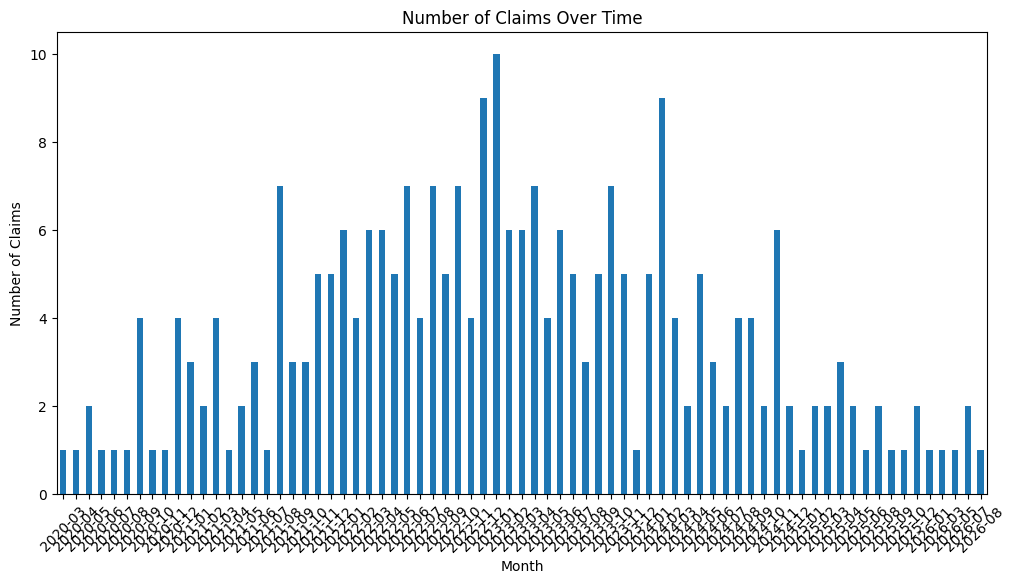

In [ ]:
claims_over_time = df['Claim_Date'].dt.to_period('M').value_counts().sort_index()
claims_over_time.plot(kind='bar', figsize=(12,6), title='Number of Claims Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Claims')
plt.xticks(rotation=45)
plt.show()


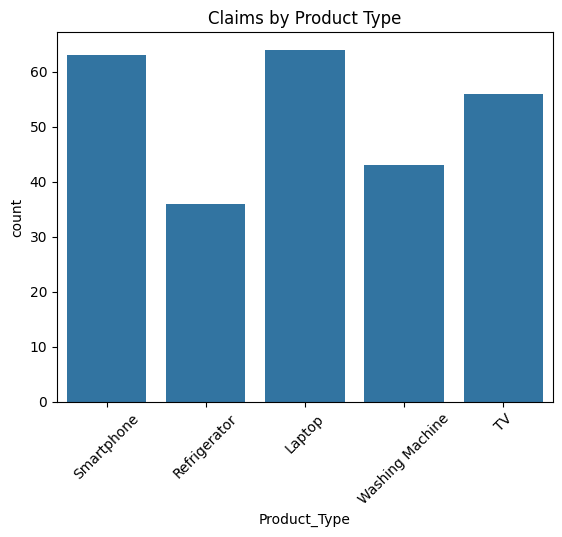

In [ ]:
sns.countplot(data=df, x='Product_Type')
plt.title('Claims by Product Type')
plt.xticks(rotation=45)
plt.show()


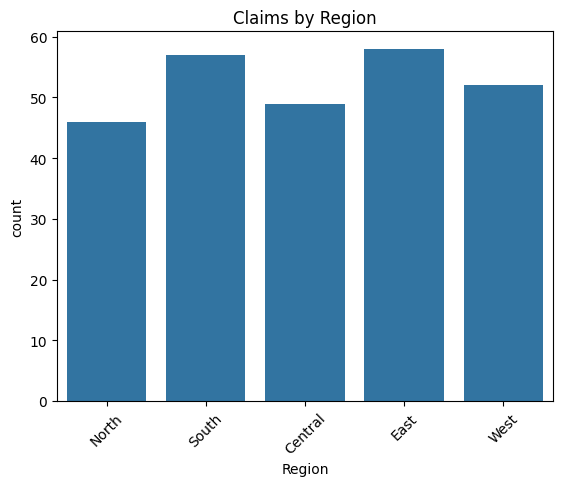

In [ ]:
sns.countplot(data=df, x='Region')
plt.title('Claims by Region')
plt.xticks(rotation=45)
plt.show()


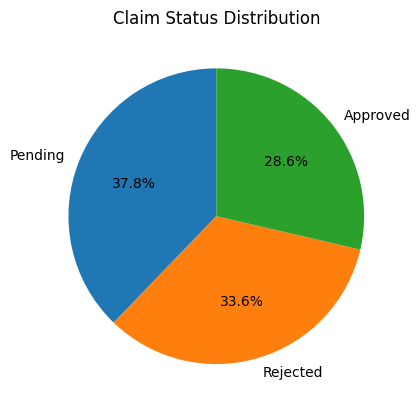

In [ ]:
df['Claim_Status'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Claim Status Distribution')
plt.ylabel('')
plt.show()


In [ ]:
df.to_csv('warranty_cleaned.csv', index=False)
